In [38]:

import gc

from tqdm import tqdm
import numpy as np
import pandas as pd

from copy import copy
from pathlib import Path
from time import time, sleep
# from contextlib import contextmanager
import matplotlib.pyplot as plt
import plotly.express as plx
import seaborn as sns

import os, sys
import gc

import config
from preprocess import preprocess_train_data
import preprocess

# from emulator import Iter_Valid
pd.set_option('display.max_rows', 120)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = (20, 15)

# print(plt.style.available)
plt.style.use("dark_background")
# plt.style.use("seaborn-dark")


print(f"curdir {Path.cwd()}")

curdir /home/sergey/mnt/st1500/Usr/Sergey/TheJob/Challenges/riiidNew


In [39]:
%%time

data_path = Path("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata")
data_ssd = Path("/mnt/data30G/2020riiid")
train_df = pd.read_feather(data_path/"train_1e5.feather", columns=config.dtypes.keys())  # .drop("row_id", axis=1)
# train_df = pd.read_feather(data_ssd/"riiid_train.feather", columns=config.dtypes.keys())  # .drop("row_id", axis=1)
questions_df = pd.read_csv(data_path/'questions.csv')
lectures_df = pd.read_csv(data_path/'lectures.csv')

# train_lectures_pd = train_df.loc[train_df.answered_correctly == -1]
# train_df = train_df.loc[train_df.answered_correctly != -1]


print("ok")

ok
CPU times: user 27.1 ms, sys: 3.97 ms, total: 31 ms
Wall time: 23.9 ms


In [40]:
%%time

train_df.astype(config.dtypes)
train_user_agg, train_content_agg, train_df = preprocess_train_data(train_df, questions_df, config.target, config.dtypes)


CPU times: user 95.9 ms, sys: 0 ns, total: 95.9 ms
Wall time: 99.7 ms


In [41]:
%%time
train_df.groupby("user_id")[["timestamp", "prior_question_elapsed_time"]].agg(["mean", "min", "max", "count"])

CPU times: user 14 ms, sys: 102 µs, total: 14.1 ms
Wall time: 12.2 ms


timestamp                                  \
                 mean          min          max count   
user_id                                                 
115      1.954877e+08       534187    668090043    24   
124      4.366048e+05       189483       571323    24   
2746     3.689378e+05            0       835457    19   
5382     9.503012e+08    393751288   2101551456    24   
8623     6.959320e+08    576911875    862338736    24   
...               ...          ...          ...   ...   
2058478  4.420435e+05            0       867885    17   
2066347  1.544670e+10  13537270452  20300691390    24   
2067931  7.422448e+07      1712517     89062366    24   
2073472  1.820232e+10  17961413616  18250788722    24   
2078569  1.128040e+08     90098833    153842445    24   

        prior_question_elapsed_time                          
                               mean      min      max count  
user_id                                                      
115                    18749.958984  14333.0  23000.0    24  
124                    17833.208984   6500.0  33333.0    24  
2746                   18055.554688  13000.0  28000.0    18  
5382                   30916.666016   5000.0  72000.0    24  
8623                   17750.000000  10000.0  37000.0    24  
...                             ...      ...      ...   ...  
2058478                40187.500000  17000.0  82000.0    16  
2066347                25041.666016  10000.0  47000.0    24  
2067931                17291.666016  10000.0  46000.0    24  
2073472                16583.333984   5000.0  29000.0    24  
2078569                17583.333984   6000.0  37000.0    24  

[349 rows x 8 columns]

train_df_mean.shape
(349, 1)
prior_question_elapsed_time  mean    348
dtype: int64


(array([  9.,  35., 168.,  80.,  34.,  10.,   7.,   1.,   2.,   2.]),
 array([ 1333.375,  8649.759, 15966.143, 23282.525, 30598.91 , 37915.293,
        45231.676, 52548.06 , 59864.445, 67180.83 , 74497.21 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

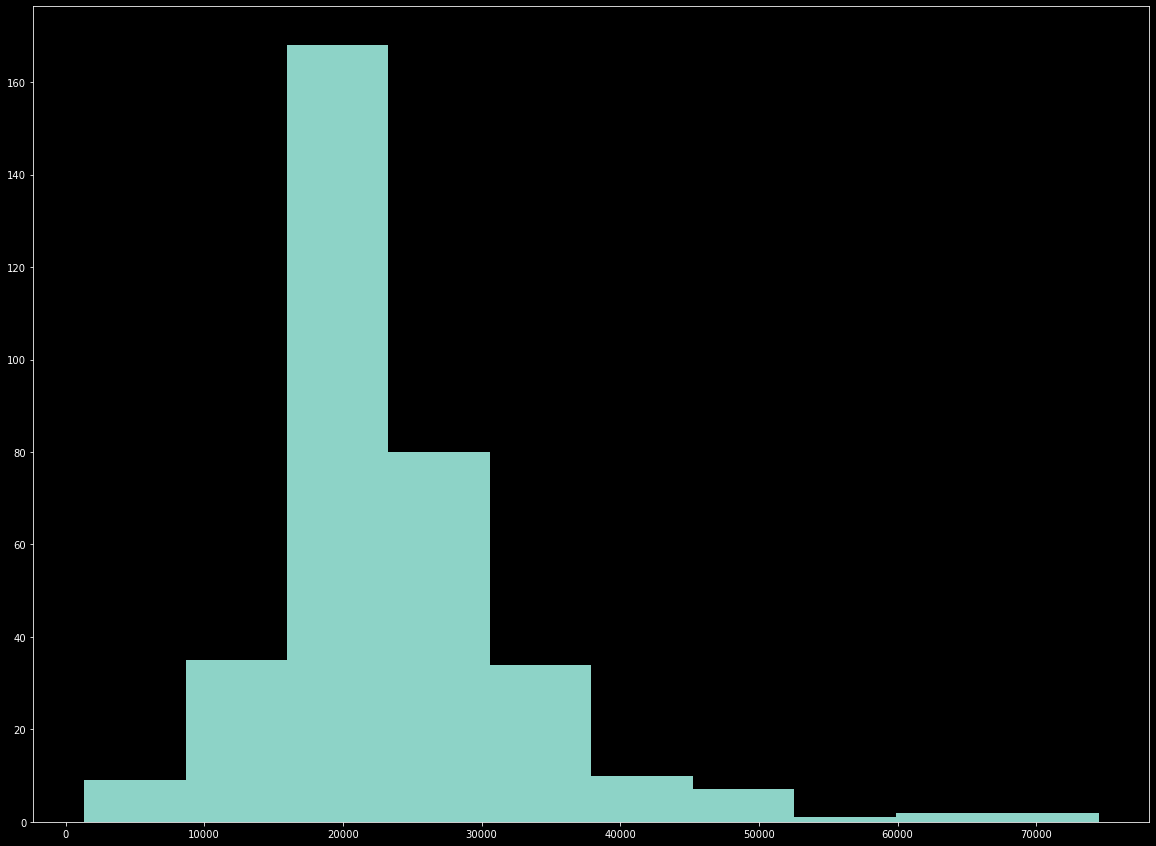

In [43]:
train_df_mean = train_df.groupby("user_id")[["prior_question_elapsed_time"]].agg(["mean"])
print("train_df_mean.shape")
print(train_df_mean.shape)
print(train_df_mean.count())
plt.hist(train_df_mean)

In [ ]:
%%time
target = "answered_correctly"
# Answer for the previous questions of users
train_df['lag'] = train_df.groupby('user_id')[target].shift()
print(type(train_df['lag']))
# For each user (groupby('user_id')), compute the cummulative number of correct answers and number answers in general
groupby = train_df.groupby('user_id')['lag']
print(type(groupby))
cum = groupby.agg(['cumsum', 'cumcount'])

# User correctness (measure the users' learning progress)
train_df['user_correctness'] = cum['cumsum'] / cum['cumcount']
# Drop the 'lag' feature
train_df.drop(columns = ['lag'], inplace = True)

In [ ]:
y_train = train_df.pop("answered_correctly")

y_train.compute()


In [ ]:
%%time

for col, dtype in dtypes.items():
    if col not in ["timestamp", "prior_question_elapsed_time"]:
        train_df[col] = train_df[col].astype(dtype, errors="ignore")
        gc.collect()
        # valid_pd[col] = valid_pd[col].astype(dtype, errors="ignore")

train_df.timestamp = (train_df.timestamp/(1000)).astype(np.int16, errors="ignore")
train_df.prior_question_elapsed_time = (train_df.prior_question_elapsed_time/1000).astype(np.int8, errors="ignore")

y_train = train_df.pop("answered_correctly")
gc.collect()

In [ ]:
train_df.head()

In [ ]:

train_df = train_df.loc[train_df.content_type_id == 0]
# valid_pd = valid_pd.loc[valid_pd.content_type_id == 0]

# valid_pd = valid_pd.iloc[:int(1e4)]
# valid_pd.to_feather("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/cv1_valid_1e4.feather")

print("train_df.shape", train_df.shape)
# print("valid_pd.shape", valid_pd.shape)
train_df.head()

In [ ]:

print(train_df.timestamp.max(), train_df.prior_question_elapsed_time.max())

In [ ]:
print(train_df.timestamp.mean(), train_df.prior_question_elapsed_time.mean())

In [ ]:
print(train_df.timestamp.median(), train_df.prior_question_elapsed_time.median())

In [ ]:
plt.figure(figsize=(15, 7))
train_df.timestamp.hist(bins=50);

In [ ]:
print(f'Of the {train_df.user_id.nunique()} users in train we have {train_df[train_df.timestamp == 0].user_id.nunique()} users with a timestamp zero row.')

In [ ]:
train_df = train_df.loc[train_df.content_type_id == 0]
# valid_pd = valid_pd.loc[valid_pd.content_type_id == 0]

# valid_pd = valid_pd.iloc[:int(1e4)]
# valid_pd.to_feather("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/cv1_valid_1e4.feather")

print("train_df.shape", train_df.shape)
# print("valid_pd.shape", valid_pd.shape)
train_df.head()

In [ ]:
train_df.info()

## ПРОПУСКИ

### prior_question_had_explanation

In [ ]:
# в prior_question_had_explanation пропуски заполняем False
train_df.prior_question_had_explanation = train_df.prior_question_had_explanation.fillna(False)
train_df.prior_question_had_explanation.value_counts(dropna=False)

### prior_question_elapsed_time

In [ ]:
# Попробую забить нулями, потом подумать
# TODO
train_df.prior_question_elapsed_time = train_df.prior_question_elapsed_time.fillna(0)


In [ ]:
train_df.isna().any()

In [ ]:
%%time
# train_dd = dd.from_pandas(train_df)
# users = train_dd.groupby("user_id")
train_dd = dd.read_parquet("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/train.parquet", low_memory=False, dtype=dtypes)
# train_dd = dd.read_csv("/mnt/data30G/2020riid/train.csv", low_memory=False)
users = train_dd.groupby("user_id").agg(['min', 'max']).compute()


In [ ]:
users

In [ ]:
train_df = train_df.loc[train_df.content_type_id == 0]
# valid_pd = valid_pd.loc[valid_pd.content_type_id == 0]

# valid_pd = valid_pd.iloc[:int(1e4)]
# valid_pd.to_feather("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/cv1_valid_1e4.feather")

print("train_df.shape", train_df.shape)
# print("valid_pd.shape", valid_pd.shape)
train_df.head()

In [ ]:
train_df.isna().any()

In [ ]:
%%time
# train_dd = dd.from_pandas(train_df)
# users = train_dd.groupby("user_id")
train_dd = dd.read_parquet("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/train.parquet", low_memory=False, dtype=dtypes)
# train_dd = dd.read_csv("/mnt/data30G/2020riid/train.csv", low_memory=False)
users = train_dd.groupby("user_id").agg(['min', 'max']).compute()


In [ ]:
users

In [ ]:
train_df = train_df.loc[train_df.content_type_id == 0]
# valid_pd = valid_pd.loc[valid_pd.content_type_id == 0]

# valid_pd = valid_pd.iloc[:int(1e4)]
# valid_pd.to_feather("/home/sergey/mnt/4.5Tb/Downloads/riiidCVdata/cv1_valid_1e4.feather")

print("train_df.shape", train_df.shape)
# print("valid_pd.shape", valid_pd.shape)
train_df.head()

In [ ]:
train_df.info()

## ПРОПУСКИ

### prior_question_had_explanation

In [ ]:
train_df.prior_question_had_explanation.value_counts(dropna=False)

In [ ]:
len(train_df.loc[train_df.timestamp == 0])

In [ ]:
train_isna = train_df[train_df.prior_question_had_explanation.isna()]
train_df = train_df.loc[train_df.prior_question_had_explanation.notna()]

print("len(train_df[train_df.timestamp == 0])", len(train_df[train_df.timestamp == 0]))
print("len(train_df[train_df.content_type_id == 1])", len(train_df[train_df.content_type_id == 1]))
print("train_df.shape", train_df.shape)
print("train_isna.shape", train_isna.shape)
train_df.head()

In [ ]:
train_df.user_id.nunique()

In [ ]:
train_df.info()

In [ ]:
train_df.memory_usage(deep=True)

In [ ]:
users = train_df.groupby("user_id")
count = 0
count_zeros = 0
user_attempts = []
users_multiple_zero = []
for user_id, user_df in users:
    user_attempts.append(user_df.shape[0])
    zeros_timestamp = len(user_df.loc[user_df.timestamp == 0])
    if user_df.prior_question_had_explanation.isna().any():
        print(user_id)
    if zeros_timestamp > 1:
        count_zeros+=1
        users_multiple_zero.append(zeros_timestamp)
        print(count_zeros, user_id, zeros_timestamp)
    count+=1
print(count)
print("users_multiple_zero", users_multiple_zero)

In [ ]:
train_df.loc[train_df.timestamp == 0].user_id.unique()


In [ ]:
plt.figure(figsize=(20, 20))
sns.histplot(user_attempts)

In [ ]:
plx.histogram(user_attempts)

## Clustering


In [ ]:
validaten_flg = True
if validaten_flg:
    iter_test = Iter_Valid(valid_pd,max_user=1000)
    predicted = []
    def set_predict(df):
        predicted.append(df)
else:
    import riiideducation
    env = riiideducation.make_env()
    iter_test = env.iter_test()
    set_predict = env.predict

## iterator
Now we can use iter_test(wrapper for env.iter_test) and set_predict(wrapper for env.predict) as usual.


In [ ]:



result = train_df.copy()
users = train_df.groupby("user_id")
count_ = users["index"].count()
print(type(count_))
max_ = users.max()
print(users)
# print(users)
result = result.merge(count_, left_on="user_id", right_index=True)
result = result.merge(max_, left_on="user_id", right_index=True)
result.head()
# result = result.merge()

In [ ]:
# %%time
#
# # pbar = tqdm(total=2500000)
# pbar = tqdm(total=valid_pd.shape[0])
# previous_test_df = None
# current_list = []
# for (current_test, current_prediction_df) in iter_test:
#     if previous_test_df is not None:
#         answers = eval(current_test["prior_group_answers_correct"].iloc[0])
#         responses = eval(current_test["prior_group_responses"].iloc[0])
#         previous_test_df['answered_correctly'] = answers
#         previous_test_df['user_answer'] = responses
#         # your feature extraction and model training code here
#
#     curtl =  len(current_test)
#     current_list.append(curtl)
#     previous_test_df = current_test.copy()
#     current_test = current_test[current_test.content_type_id == 0]
#     # your prediction code here
#     current_test['answered_correctly'] = 0.5
#     set_predict(current_test.loc[:,['row_id', 'answered_correctly']])
#     pbar.update(len(current_test))
#

In [ ]:
%%time

# pbar = tqdm(total=2500000)
pbar = tqdm(total=valid_pd.shape[0])
nlectures = valid_pd.loc[valid_pd.content_type_id == 1].shape[0]
previous_test_df = None
for (current_test, current_prediction_df) in iter_test:
    if previous_test_df is not None:
        previous_test_ar = np.array([
            eval(current_test["prior_group_answers_correct"].iloc[0]),
            eval(current_test["prior_group_responses"].iloc[0]),

        ])
        # your feature extraction and model training code here

    # curtl =  len(current_test)
    # current_list.append(curtl)
    previous_test_df = current_test.copy()
    current_test = current_test[current_test.content_type_id == 0]
    # your prediction code here
    current_test['answered_correctly'] = 0.5
    set_predict(current_test.loc[:,['row_id', 'answered_correctly']])
    pbar.update(len(current_test))


In [ ]:
curlist_df = pd.DataFrame(current_list, columns=["batch_size"])

In [ ]:
plx.histogram(current_list, nbins=10, width=200, height=300)

In [ ]:
%%time
# train_dd = train_dd.loc[:10000]
print("1 train_dd.head()")

# train_dd.head()
print(type(train_df))
train_df.shape


In [ ]:
%%time

if "row_id" in train_dd.columns:
    # train.set_index("row_id", inplace=True)
    train_dd = train_dd.set_index("row_id")
    # res = train_dd.mean()
    # res = delayed(train_dd.mean)()
# res_delayed = res.compute()
print("res = train_dd.mean()")
# print(res_delayed)

In [ ]:
%%time

res_delayed = delayed(train_dd.mean)()


In [ ]:
res_delayed.visualize()

In [ ]:
%%time

with ProgressBar():
    out = res_delayed.compute()

    print(f" out res_delayed = \n {out}")

In [ ]:
res_delayed.visualize()

In [ ]:
# train_dd["attempt"] = -1

print(f" train_dd.head() 2 = ")
train_dd.head()


In [ ]:
train_dd.count().compute()

In [ ]:
len(train_dd) - train_dd.count().compute()

In [ ]:
print(train_dd.shape[0].compute(), train_dd.shape[1])

In [ ]:
pd.Series(train_dd.user_id.compute()).nunique()


In [ ]:
%%time
print("max", train_dd.user_id.compute().value_counts().max())
print("mean", train_dd.user_id.compute().value_counts().mean())
print("median", train_dd.user_id.compute().value_counts().quantile(.5))

In [ ]:
%%time
max, mean, median = compute(
    train_dd.user_id.value_counts().max(),
    train_dd.user_id.value_counts().mean(),
    train_dd.user_id.value_counts().quantile(.5)
)
print(max, mean, median)

In [ ]:
def get_user_quantiles(df, plot=False):

    quantiles = []
    for q in np.arange(start=.4, stop=.8, step=.1):
        quantiles.append((q, df.user_id.value_counts().quantile(q=q).compute()))
        if plot:
            print(f"quantile {quantiles[-1]}")
            plt.plot(*quantiles[-1], marker="o",  c="w")
    return quantiles

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_dd.columns

In [ ]:
# total = train_dd.user_id.nunique()
groups = train_dd.groupby(by="user_id")
# total = len(groups.size())
# print("total", total)

In [ ]:
%%time
def print_count(group):
    print("print 1 from print_count")

groups_apply = groups.sum()

In [ ]:
%%time
groups_apply.compute()

In [ ]:
iter = groups


In [ ]:
%%time

content_id_sum = groups.content_id.sum()

print("content_id_sum.compute()")
content_id_sum.compute()

In [ ]:
%%time
agg = groups.aggregate(['sum', 'mean', 'max', 'min', list]).compute()

In [ ]:
agg

In [ ]:
agg.loc[115, "timestamp"]["sum"]

In [ ]:
with timer("rolling values"):
    for id, df in tqdm(groups, total=total):
        print("ok")
        # print(f"  user_id = {id}  shape = {df.shape[0]} is_monotonic {df.timestamp.is_monotonic}")
        pass
        # train_dd.loc[df.index, "attempt"] = range(1, df.shape[0]+1)

        # quantiles = get_user_quantiles(df=df)
        #
        # for quantile, val in quantiles:
        #     train_dd.loc[df.index, f"q{quantile}_None"] = df.timestamp.rolling(
        #         int(val),
        #         min_periods=1,
        #         win_type=None,
        #     ).quantile(quantile)
        #
        #     train_dd.loc[df.index, f"q{quantile}_gauss"] = df.timestamp.rolling(
        #         int(val),
        #         min_periods=1,
        #         win_type="gaussian",
        #     ).mean(std=3)
        #
        #     train_dd.loc[df.index, f"q{quantile}_exp"] = df.timestamp.rolling(
        #         int(val),
        #         min_periods=1,
        #         win_type="exponential",
        #     ).sum(tau=3)

# train_dd = train_dd.compute()



In [ ]:
train_shuffled = train.sample()
print("train.shape", train.shape)
train.head(20)

In [ ]:
submit_example = pd.read_csv("./input/example_sample_submission.csv", )
test = pd.read_csv("./input/example_test.csv")
lectures = pd.read_csv("./input/lectures.csv")
questions = pd.read_csv("./input/questions.csv")
print("ok")

In [ ]:
print("submit_example.shape", submit_example.shape[0])
submit_example.head()

In [ ]:
print("test.shape", test.shape)
test.head()

In [ ]:
print("lectures.shape", lectures.shape)
lectures.head()



In [ ]:
set(train.columns).symmetric_difference(set(test.columns))

In [ ]:
set(test.columns) - set(train.columns)

In [ ]:
set(train.columns) - set(test.columns)

In [ ]:
train.columns

In [ ]:
test.columns


In [ ]:
%time

# train_dt = dt.fread("./input/train.csv")
# print("train_dt.head()")
# train_dt.head(5)

##Questions

In [ ]:
print("questions.shape", questions.shape)
questions.head()

In [ ]:
bundle_ids = questions.value_counts(subset=["bundle_id"])
print(bundle_ids)
plt.hist(x=bundle_ids, bins=10);


In [ ]:
questions.value_counts(subset=["correct_answer"])


In [ ]:
questions.value_counts(subset=["part"])



In [ ]:
questions.tags = questions.tags.astype(str).apply([str.strip, str.split])
questions.tags[0][0]

In [ ]:
# ll = train_dt.shape[0]
#
# uniques = dt.unique(train_dt["user_id"]).shape[0]
# print(ll)
# print(uniques)
# print(ll/uniques)

In [ ]:
value_counts = train.user_id.value_counts()

In [ ]:
value_counts

In [ ]:
plt.hist(value_counts);